### PCA - Principal Component Analysis

### **What is PCA ?**
**Principal Component Analysis (PCA)** is a **dimensionality reduction technique** used in machine learning and statistics to simplify large datasets while preserving as much variability (information) as possible.

---

### **What is the goal of PCA?**

To reduce the number of input features (dimensions) by transforming the original variables into a **new set of variables** called **principal components** that:

* Are **uncorrelated** (orthogonal),
* Are **ranked by importance**, meaning the first few components capture the **most variance** in the data.

---

### **Why do we use PCA?**

* To **visualize** high-dimensional data in 2D or 3D.
* To **reduce computational cost** for ML models.
* To **remove noise or redundancy** (especially if features are correlated).
* To avoid the **curse of dimensionality** in high-dimensional spaces.

---

### **How PCA works (Step-by-Step):**

1. **Standardize the data**: Scale features so they have mean 0 and variance 1.
2. **Compute the covariance matrix** of the features.
3. **Compute the eigenvectors and eigenvalues** of the covariance matrix.

   * Eigenvectors define the **directions** of the new feature space (principal components).
   * Eigenvalues define the **magnitude** (importance) of each component.
4. **Sort eigenvectors** by decreasing eigenvalues — the top `k` are chosen for the new feature space.
5. **Project the data** onto these `k` principal components.

---

### **Example:**

Suppose you have a dataset with 100 features, but most of the variance (say, 95%) is explained by just 3 components. PCA lets you **reduce** your data to 3 dimensions with minimal information loss.

---

### **Important Notes:**

* PCA is **unsupervised** — it doesn’t use labels.
* It's a **linear** technique — it may not capture complex nonlinear relationships.
* After PCA, features lose their original meaning (e.g., “age” or “income” no longer have direct interpretations).

### Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [6]:
df = pd.read_csv('../../datasets/Wine.csv')
print(df.sample(5))

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
145    13.16        3.57  2.15          21.0        102           1.50   
25     13.05        2.05  3.22          25.0        124           2.63   
6      14.39        1.87  2.45          14.6         96           2.50   
26     13.39        1.77  2.62          16.1         93           2.85   
90     12.08        1.83  2.32          18.5         81           1.60   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
145        0.55                  0.43             1.30             4.00  0.60   
25         2.68                  0.47             1.92             3.58  1.13   
6          2.52                  0.30             1.98             5.25  1.02   
26         2.94                  0.34             1.45             4.80  0.92   
90         1.50                  0.52             1.64             2.40  1.08   

     OD280  Proline  Customer_Segment  
145   1.68      830         

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print('\n')
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train)
print('\n')
print(X_test)
print('\n')
print(y_train)
print('\n')
print(y_test)
print('\n')

[[1.434e+01 1.680e+00 2.700e+00 ... 5.700e-01 1.960e+00 6.600e+02]
 [1.253e+01 5.510e+00 2.640e+00 ... 8.200e-01 1.690e+00 5.150e+02]
 [1.237e+01 1.070e+00 2.100e+00 ... 1.040e+00 2.770e+00 6.600e+02]
 ...
 [1.438e+01 1.870e+00 2.380e+00 ... 1.200e+00 3.000e+00 1.547e+03]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.234e+01 2.450e+00 2.460e+00 ... 8.000e-01 3.380e+00 4.380e+02]]


[[1.364000e+01 3.100000e+00 2.560000e+00 1.520000e+01 1.160000e+02
  2.700000e+00 3.030000e+00 1.700000e-01 1.660000e+00 5.100000e+00
  9.600000e-01 3.360000e+00 8.450000e+02]
 [1.421000e+01 4.040000e+00 2.440000e+00 1.890000e+01 1.110000e+02
  2.850000e+00 2.650000e+00 3.000000e-01 1.250000e+00 5.240000e+00
  8.700000e-01 3.330000e+00 1.080000e+03]
 [1.293000e+01 2.810000e+00 2.700000e+00 2.100000e+01 9.600000e+01
  1.540000e+00 5.000000e-01 5.300000e-01 7.500000e-01 4.600000e+00
  7.700000e-01 2.310000e+00 6.000000e+02]
 [1.373000e+01 1.500000e+00 2.700000e+00 2.250000e+01 1.010000

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)

### Applying Kernel PCA

In [15]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_k = kpca.fit_transform(X_train)
X_test_k = kpca.transform(X_test)

### Training the Logistic Regression with PCA

In [17]:
from sklearn.linear_model import LogisticRegression
classifier_p = LogisticRegression(random_state = 0)
y_train_p = y_train.copy()
classifier_p.fit(X_train_p, y_train_p)

LogisticRegression(random_state=0)

### Training the Logistic Regression with Kernel PCA

In [19]:
from sklearn.linear_model import LogisticRegression
classifier_k = LogisticRegression(random_state = 0)
y_train_k = y_train.copy()
classifier_k.fit(X_train_k, y_train_k)

LogisticRegression(random_state=0)

### Making the Confusion Matrix for PCA

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
y_pred_p = classifier_p.predict(X_test_p)
cm_p = confusion_matrix(y_test, y_pred_p)
print("Confusion Matrix:\n", cm_p)
accuracy_p = accuracy_score(y_test, y_pred_p)
print("Accuracy:", accuracy_p)
precision_p = precision_score(y_test, y_pred_p, average='macro')
print("Precision (macro):", precision_p)
recall_p = recall_score(y_test, y_pred_p, average='macro')
print("Recall (macro):", recall_p)
f1_p = f1_score(y_test, y_pred_p, average='macro')
print("F1 Score (macro):", f1_p)

Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


### Making the Confusion Matrix for Kernel PCA

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
y_pred_k = classifier_k.predict(X_test_k)
cm_k = confusion_matrix(y_test, y_pred_k)
print("Confusion Matrix:\n", cm_k)
accuracy_k = accuracy_score(y_test, y_pred_k)
print("Accuracy:", accuracy_k)
precision_k = precision_score(y_test, y_pred_k, average='macro')
print("Precision (macro):", precision_k)
recall_k = recall_score(y_test, y_pred_k, average='macro')
print("Recall (macro):", recall_k)
f1_k = f1_score(y_test, y_pred_k, average='macro')
print("F1 Score (macro):", f1_k)

Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


### Visualising the Training set results for PCA

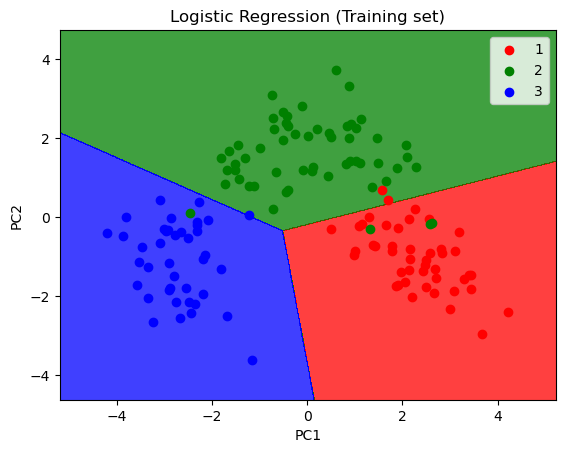

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_p, y_train

# Create grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict over grid
Z = classifier_p.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot actual data points without warning
colors = ['red', 'green', 'blue']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=j)

# Final plot labels
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


### Visualising the Training set results for  Kernel PCA

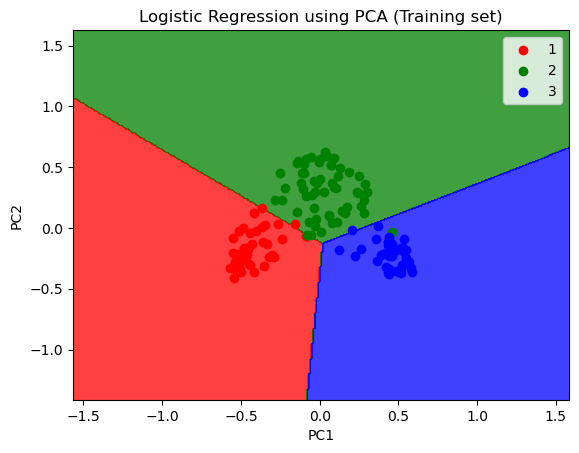

In [27]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train_k, y_train_k

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

Z = classifier_k.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['red', 'green', 'blue'][i], label=j)

plt.title('Logistic Regression using PCA (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results with PCA

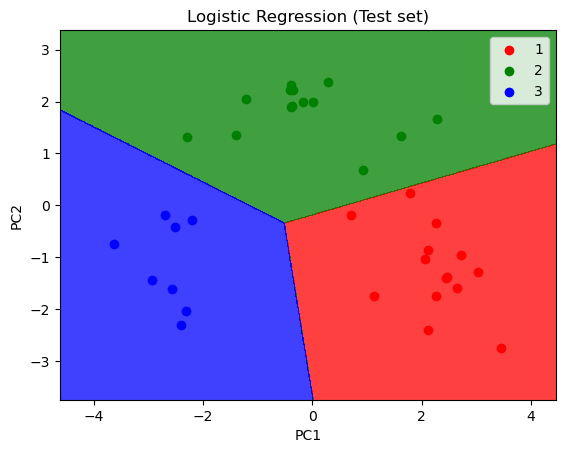

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_p, y_test  

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

Z = classifier_p.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = ['red', 'green', 'blue']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=j)

# Final plot labels
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results with Kernal PCA

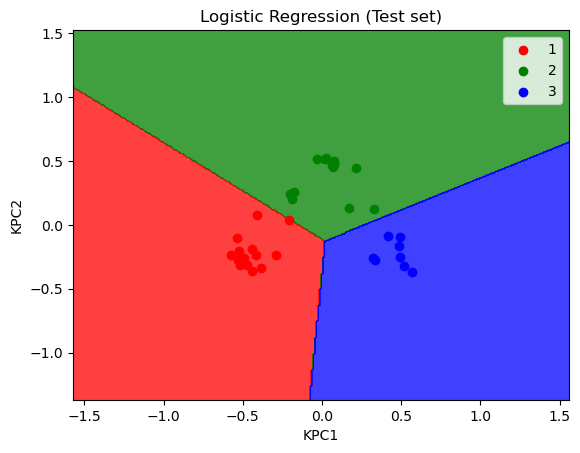

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_k, y_test  

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

Z = classifier_k.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = ['red', 'green', 'blue']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()